# OUR GOAL

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

# 1.Exploratory Data Analysis

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


In [10]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Since we will be attempting to predict loan_status, creating a countplot for Fully paid vs Not Paid

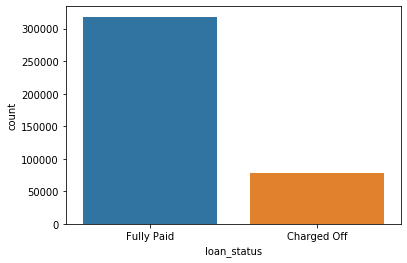

In [13]:
sns.countplot(data=df,x='loan_status')

Histogram for loan_amt column

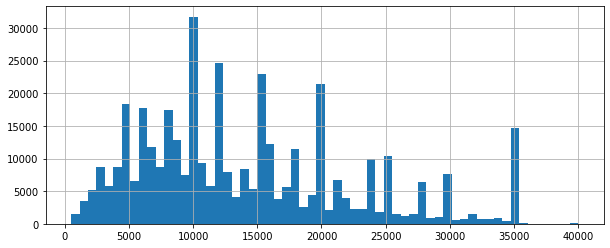

In [14]:
plt.figure(figsize=(10,4))
df['loan_amnt'].hist(bins=60)

Correlation between the continuous feature variables

In [15]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


Visualizing Above Correlation Using Heatmap

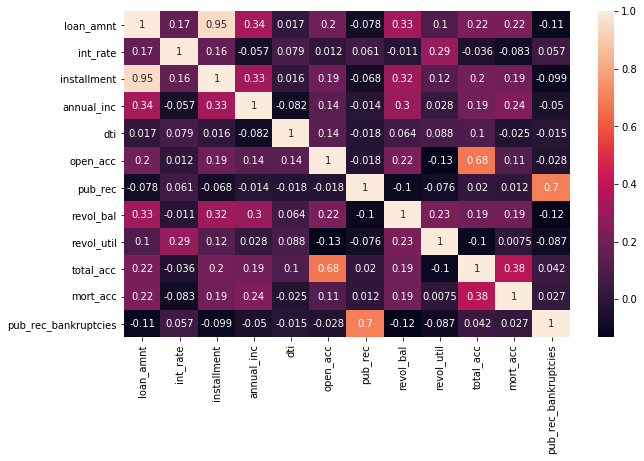

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Calculating the summary statistics for the loan amount, grouped by the loan_status.

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Exploring the Grade and SubGrade columns that LendingClub attributes to the loans.

In [21]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [22]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Creating a countplot per grade and Setting the hue to the loan_status label.

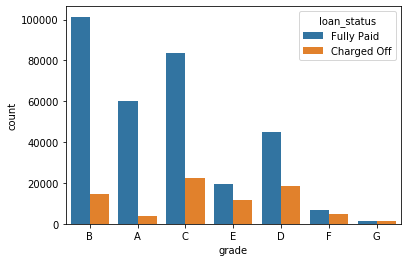

In [23]:
sns.countplot(data=df,x='grade',hue='loan_status')

Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [24]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [25]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


# 2. Data PreProcessing
Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

**Checking Null values per column**

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Converting this Series to be in term of percentage of the total DataFrame**

In [27]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examining emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [29]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Number of unique employment job titles**

In [30]:
df['emp_title'].nunique()

173105

In [31]:
df['emp_title'].value_counts()

Teacher                               4389
Manager                               4250
Registered Nurse                      1856
RN                                    1846
Supervisor                            1830
                                      ... 
jcpenney logistics                       1
Director, Client Relations               1
ManageAmerica                            1
Ackerman & Co.                           1
Community Health Center Central Wy       1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [32]:
df = df.drop('emp_title',axis=1)

***This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.After Creating it, visualizing it with a bar plot.***

In [33]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [34]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [35]:
emp_len = emp_co/emp_fp

In [36]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

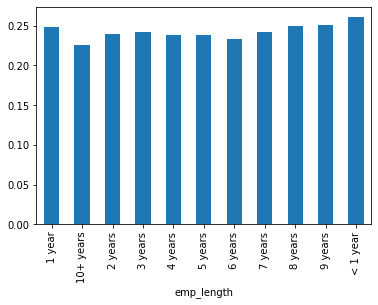

In [37]:
emp_len.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths, dropping the emp_length column.**

In [38]:
df = df.drop('emp_length',axis=1)

**Revisiting the DataFrame to see what feature columns still have missing data.**

In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Reviewing the title column vs the purpose column. Is this repeated information?**

In [40]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [41]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column,dropping the title column**

In [42]:
df = df.drop('title',axis=1)

**Finding out what the mort_acc feature represents**

In [43]:
feat_info('mort_acc')

Number of mortgage accounts.


**Creating a value_counts of the mort_acc column**

In [44]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach.Reviewing the other columns to see which most highly correlates to mort_acc**

In [45]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**The total_acc feature correlates with the mort_acc , this makes sense!, grouping the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [46]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Filling in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns**

In [47]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [48]:
total_acc_avg[2.0]

0.0

In [49]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [50]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [51]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna()**

In [52]:
df = df.dropna()

In [53]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# 3.Categorical Variables and Dummy Variables
Done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

In [54]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**Going through all the string features to see what we should do with them**

***term feature***

**Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [55]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [56]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

***grade feature***

**grade is part of sub_grade, so just drop the grade feature**

In [57]:
df = df.drop('grade',axis=1)

**Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [58]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [59]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [60]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [61]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

***verification_status, application_type,initial_list_status,purpose***

**Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns**

In [62]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

***home_ownership***

**Review the value_counts for the home_ownership column**

In [63]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns**

In [64]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

***address***

**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column**

In [65]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

**Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column**

In [66]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d
**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature**

In [67]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [68]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [69]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

# 4 .Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

**drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s**

In [72]:
df = df.drop('loan_status',axis=1)

**Set X and y variables to the .values of the features and label**

In [73]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# 5.Normalizing the Data using MinMaxScaler

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train)

In [78]:
X_test = scaler.transform(X_test)

# 6. Creating the Model

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [81]:
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting**

In [82]:
model.fit(x=X_train, y=y_train, epochs=25,batch_size=256,validation_data=(X_test, y_test),)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 5s 17us/sample - loss: 0.2992 - val_loss: 0.2644
Epoch 2/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2652 - val_loss: 0.2626
Epoch 3/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2629 - val_loss: 0.2627
Epoch 4/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2616 - val_loss: 0.2617
Epoch 5/25
316175/316175 [==============================] - 5s 14us/sample - loss: 0.2607 - val_loss: 0.2618
Epoch 6/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2601 - val_loss: 0.2615
Epoch 7/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2598 - val_loss: 0.2619
Epoch 8/25
316175/316175 [==============================] - 5s 14us/sample - loss: 0.2597 - 

**SAVING OUR MODEL**

In [83]:
from tensorflow.keras.models import load_model

In [84]:
model.save('Loan_prediction_model.h5')

# 7. Evaluating Model Performance

In [85]:
losses = pd.DataFrame(model.history.history)

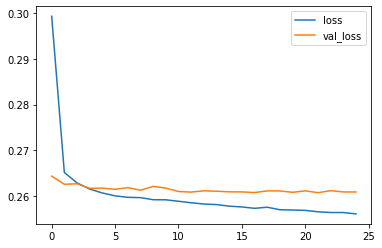

In [86]:
losses.plot()

**Creating predictions from the X_test set and display a classification report and confusion matrix for the X_test set**

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
predictions = model.predict_classes(X_test)

In [89]:
print('CLASSIFICATION REPORT')
print('\n')
print(classification_report(y_test,predictions))
print('CONFUSION MATRIX')
print('\n')
print(confusion_matrix(y_test,predictions))

CLASSIFICATION REPORT


              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

CONFUSION MATRIX


[[ 6994  8664]
 [  233 63153]]


**Given the customer below, would you offer this person a loan?**

In [99]:
import random
random.seed(98)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           35000.00
term                   60.00
int_rate               21.49
installment           956.55
annual_inc          80000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     2004.00
Name: 187235, Length: 78, dtype: float64

In [100]:
#Before Predicting Converting the new_customer to numpy array using ".values" as it is a panda series
#Second We want to reshape the values of that array to the size of X_Test that is ( ,78), as we are checking for 1 value 
#it should be (1,78)
#Then Scale the Data
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [101]:
#Checking new_customer
new_customer

array([[0.87179487, 1.        , 0.62991819, 0.61870352, 0.00918845,
        0.00171217, 0.12      , 0.        , 0.01181288, 0.07721618,
        0.10067114, 0.05882353, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.  

In [102]:
#Predicting loan_repay for new_customer
model.predict_classes(new_customer)

array([[0]])

**Did this person actually end up paying back their loan?**

In [103]:
df.iloc[random_ind]['loan_repaid']

0.0

**1 = Yes**
**0 = NO**